# Pain in the Net - Data Loading

Tyler Spears

Dr. Tom Fletcher

In [45]:
# imports
import subprocess
import os
import io
import pathlib
import math
import fractions

import numpy as np
import dipy
import dipy.io.image
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table

# visualization libraries
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'figure.facecolor': [1.0, 1.0, 1.0, 1.0]})

In [85]:
# Set up directories
data_dir = pathlib.Path("/srv/tmp/data/pitn/")
data_files = (
    data_dir / "101309/T1w/Diffusion/data.nii.gz",
)
f_bval = data_dir / "101309/T1w/Diffusion/bvals"
f_bvec = data_dir / "101309/T1w/Diffusion/bvec"

print(data_dir.exists())
print([data_file.exists() for data_file in data_files])

True
[True]


In [16]:
data, affine, img = dp.io.image.load_nifti(str(data_files[0]), return_img=True)

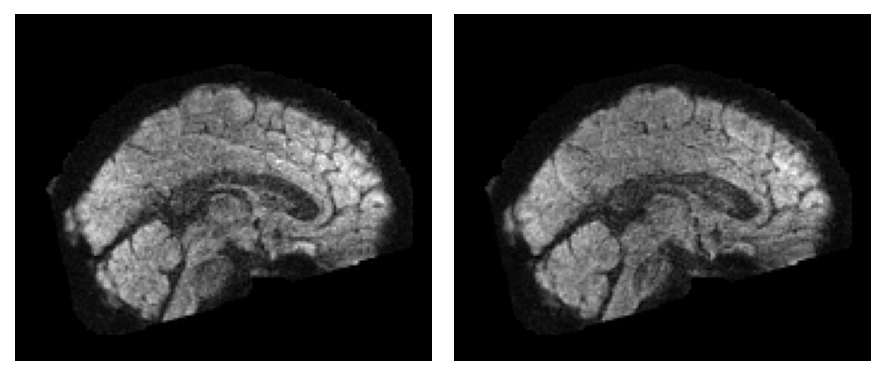

In [100]:
axial_middle = data.shape[2] // 2
coronal_middle = data.shape[1] // 2
saggital_middle = data.shape[0] // 2
plt.figure('Showing the datasets', dpi=150)
plt.subplot(1, 2, 1).set_axis_off()

plt.imshow(
    data[saggital_middle, :, :, 1].T,
    cmap='gray', origin='lower'
)

plt.subplot(1, 2, 2).set_axis_off()

plt.imshow(
    data[saggital_middle, :, :, 17].T,
    cmap='gray', origin='lower'
)

plt.show()
# plt.savefig('data.png', bbox_inches='tight')

<Figure size 720x480 with 0 Axes>

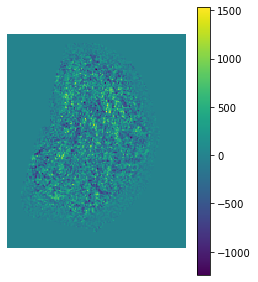

In [104]:
plt.figure(dpi=120)
plt.matshow(
    data[saggital_middle, :, :, 1] - data[saggital_middle, :, :, 17],
    origin='lower'
)
plt.axis('off');
plt.colorbar();

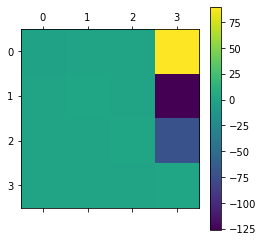

In [42]:
plt.matshow(affine)
plt.colorbar();

In [52]:
data.shape
# (saggital, coronal, axial, vol_index)

(145, 174, 145, 288)

## BVals

In [70]:
fbval = pathlib.Path("/srv/tmp/data/pitn/101309/T1w/Diffusion/bvals")
fbvec = pathlib.Path("/srv/tmp/data/pitn/101309/T1w/Diffusion/bvecs")

bvals, bvecs = read_bvals_bvecs(str(fbval), str(fbvec))


In [86]:
gtab = gradient_table(bvals, bvecs)
print(np.where(gtab.b0s_mask))

(array([  0,  16,  32,  48,  64,  80,  95, 112, 128, 144, 160, 176, 191,
       208, 224, 240, 256, 272]),)


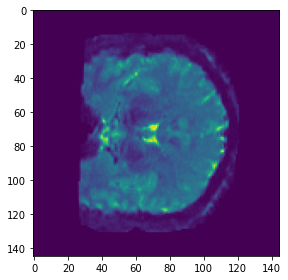

In [84]:
plt.imshow(data[:, 100, :, gtab.b0s_mask][2])